# Estimate phase by interpolating extrema
In this notebook, we use the peaks, troughs, and zerocrossings of each cycle to estimate the phase of an oscillation at each time point.

In [1]:
import numpy as np
from neurodsp import shape

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

### Load neural signal

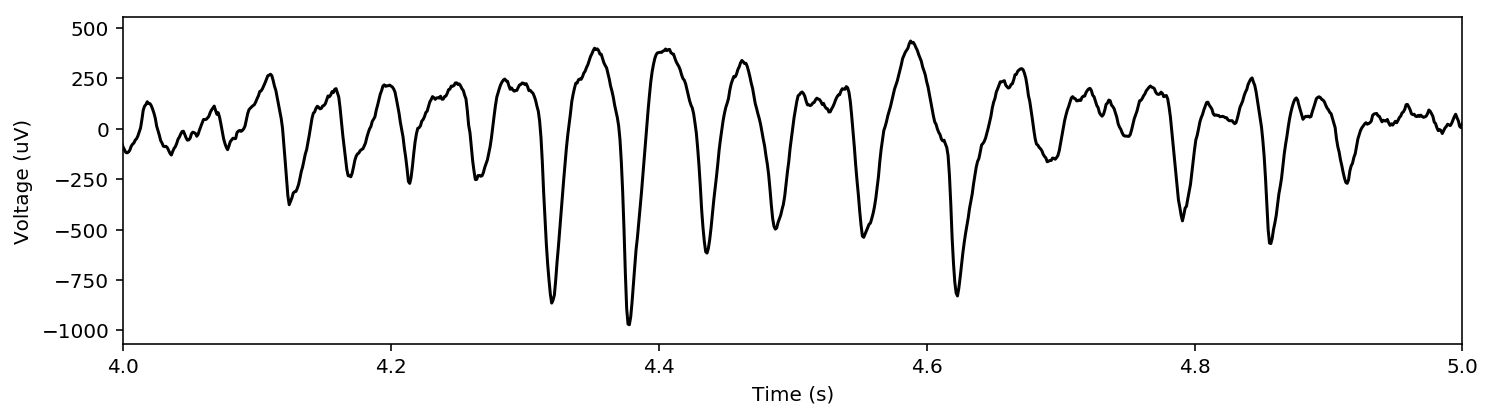

In [2]:
# Load signal
x = np.load('./data/sample_data_1.npy')
x_filt_true = np.load('./data/sample_data_1_filt.npy')
Fs = 1000
t = np.arange(0, len(x)/Fs, 1/Fs)
f_range = (13,30)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

# Find peaks, troughs, and zerocrossings

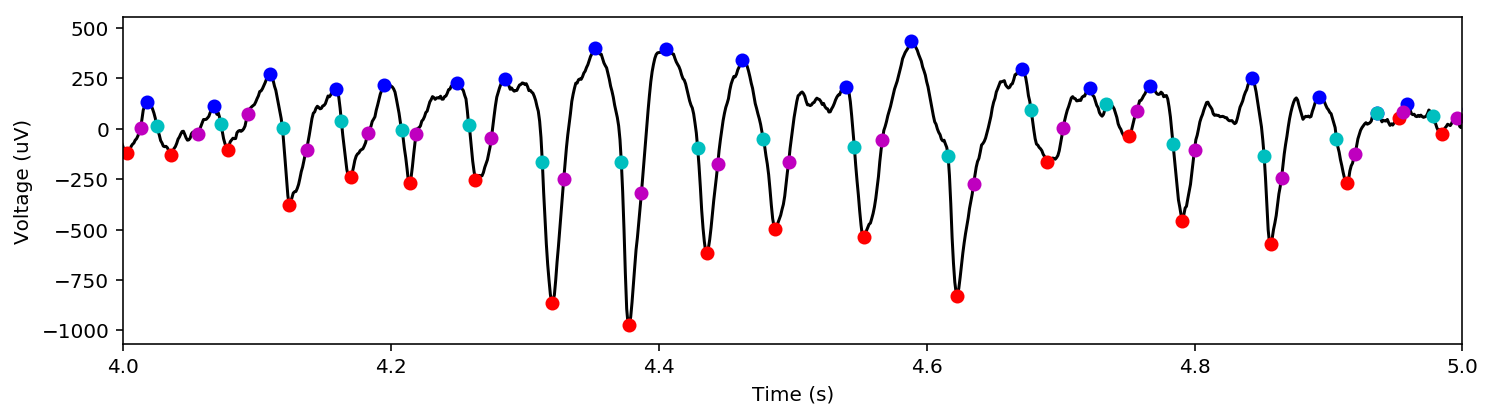

In [3]:
Ps, Ts = shape.find_extrema(x, Fs, f_range)
zeroxR, zeroxD = shape.find_zerox(x, Ps, Ts)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')
plt.plot(t[Ps], x[Ps], 'bo')
plt.plot(t[Ts], x[Ts], 'ro')
plt.plot(t[zeroxR], x[zeroxR], 'mo')
plt.plot(t[zeroxD], x[zeroxD], 'co')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

# Interpolate phase between just peaks and troughs

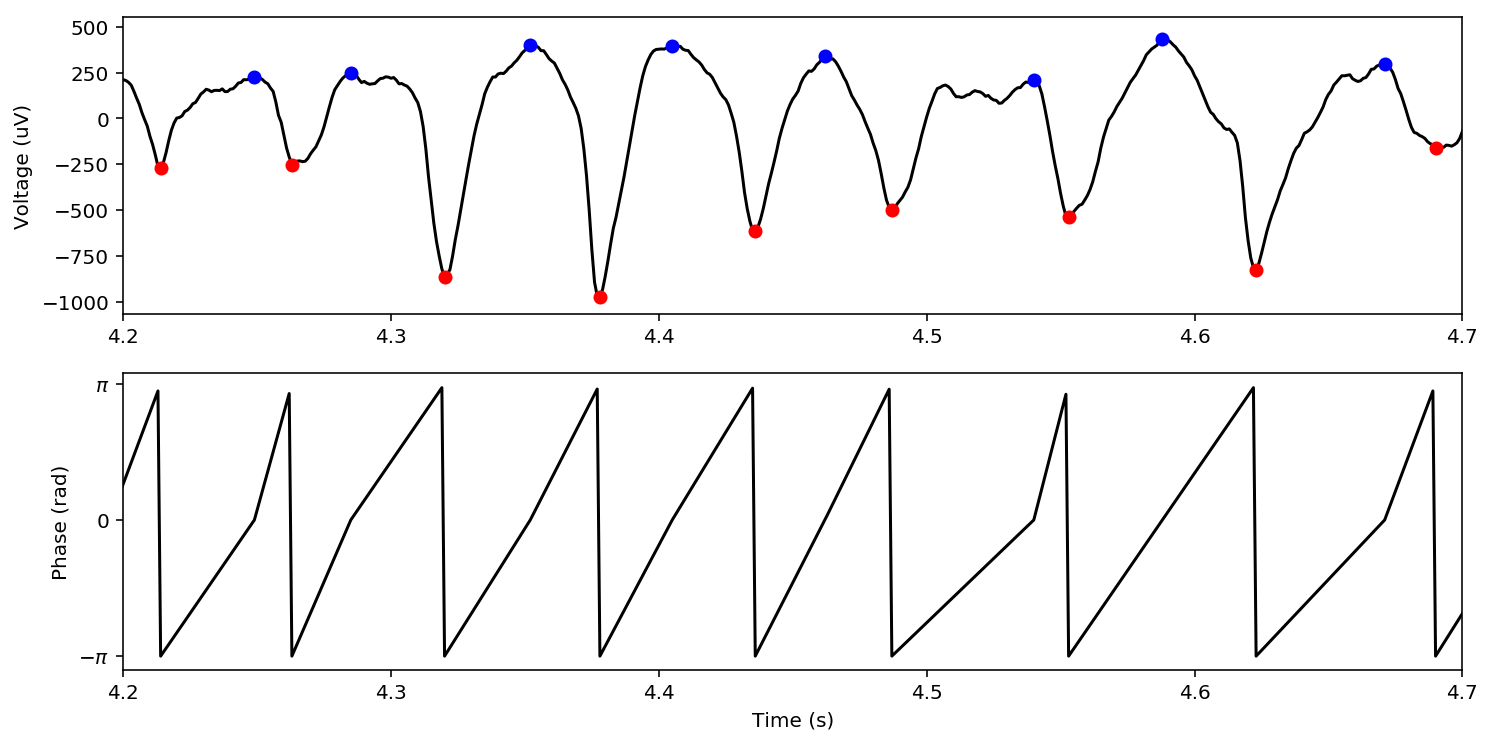

In [4]:
pha_PT = shape.extrema_interpolated_phase(x, Ps, Ts)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t, x, 'k')
plt.plot(t[Ps], x[Ps], 'bo')
plt.plot(t[Ts], x[Ts], 'ro')
plt.ylabel('Voltage (uV)')
plt.xlim((4.2, 4.7))
plt.subplot(2,1,2)
plt.plot(t, pha_PT, 'k')
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
plt.xlim((4.2, 4.7))
plt.yticks([-np.pi, 0, np.pi], ['$-\pi$',0,'$\pi$']);

# Interpolate phase between extrema and zerocrossings
Notice that the trough period (pi/2 to -pi/2) is more brief than the peak period (-pi/2 to pi/2)

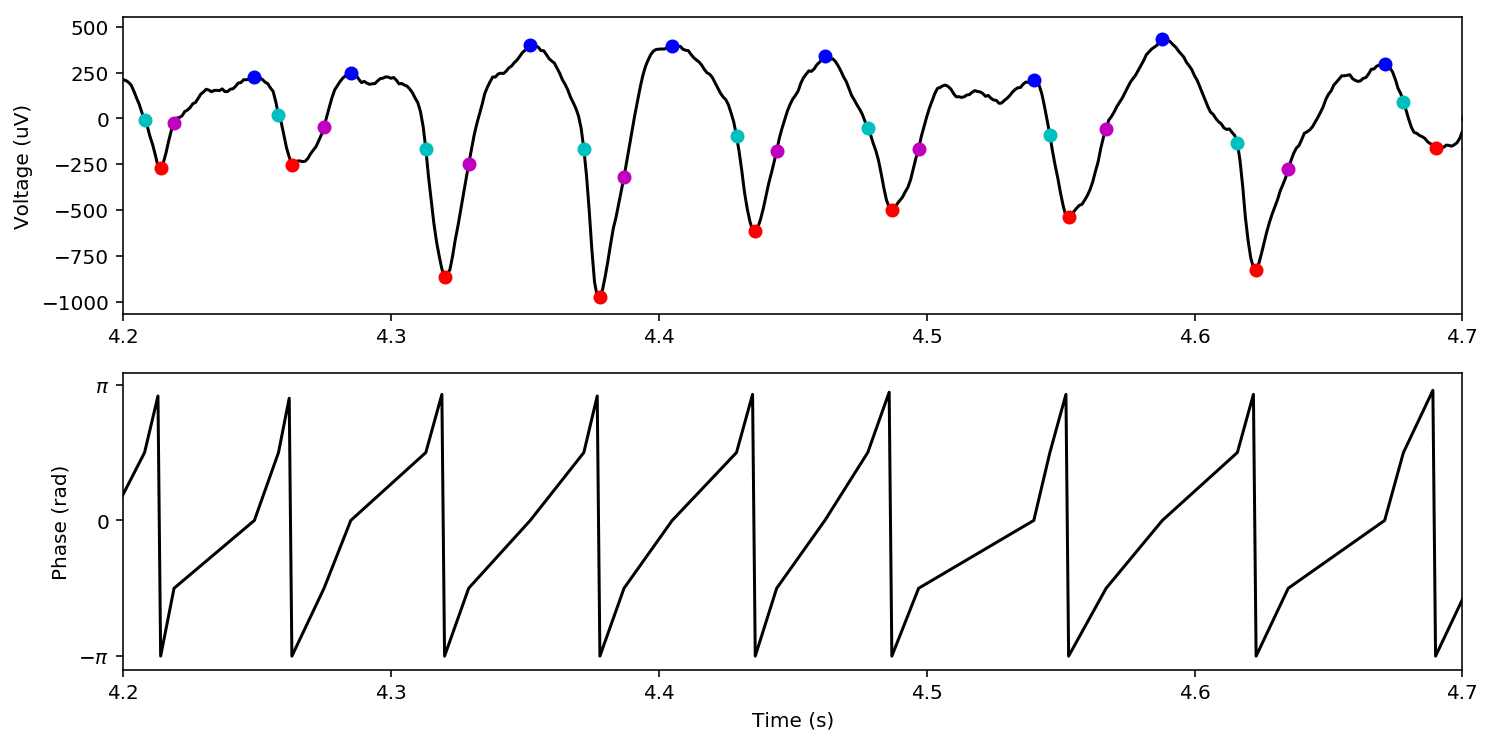

In [5]:
pha_PTRD = shape.extrema_interpolated_phase(x, Ps, Ts, zeroxR=zeroxR, zeroxD=zeroxD)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t, x, 'k')
plt.plot(t[Ps], x[Ps], 'bo')
plt.plot(t[Ts], x[Ts], 'ro')
plt.plot(t[zeroxR], x[zeroxR], 'mo')
plt.plot(t[zeroxD], x[zeroxD], 'co')
plt.ylabel('Voltage (uV)')
plt.xlim((4.2,4.7))
plt.subplot(2,1,2)
plt.plot(t, pha_PTRD, 'k')
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
plt.xlim((4.2,4.7))
plt.yticks([-np.pi, 0, np.pi], ['$-\pi$',0,'$\pi$']);